In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

import numpy as np
import pandas as pd
import seaborn as sns
from utils import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

## A. Data Exploration

In [2]:
missing_values = ['?', '.', '', ' ', '_', 'Na', 'NULL', 'null', 'not', 'Not', 'NaN', 'NA', '??', 'nan', 'inf']
raw_data = pd.read_csv('dataGaia_AB_train.csv', na_values=missing_values)
raw_data = raw_data.loc[:, ~raw_data.columns.str.contains('^Unnamed|Source')] # Drop 3 unnecessary columns
raw_data.set_index('ID', inplace=True)
print('Number of entries:', raw_data.shape[0])
print('Number of attributes:', raw_data.shape[1])

Number of entries: 148538
Number of attributes: 26


In [212]:
import io
buffer = io.StringIO() # Create a buffer to hold the output and capture the info of DataFrame into a string
raw_data.info(buf=buffer) # Check data types and missing values and
info_str = buffer.getvalue().replace("<class 'pandas.core.frame.DataFrame'>\n", '')

display_html(f"""
    <div style='width:30%; float: left; overflow-x: auto;'>
        <pre>{info_str}</pre>
    </div>
    <div style='width:70%; float: right; overflow-x: auto;'>
        {raw_data.head(15).round(2).to_html()}
    </div>
""", raw=True) # Display the info and head side by side

,RA_ICRS,DE_ICRS,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,e_BPmag,RPmag,e_RPmag,GRVSmag,e_GRVSmag,BP-RP,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,44.38,2.90,1.89,16.95,7.03,-15.43,10.37,0.0,10.44,0.0,10.21,0.00,10.14,0.01,0.24,0.07,0.16,NaN,9348.7,679.71,2.46,25.82,2.16,0.34,0.64,A
2,42.96,2.92,2.97,2.53,1.80,1.78,10.04,0.0,10.21,0.0,9.73,0.00,9.61,0.01,0.48,0.17,0.30,NaN,7520.7,339.81,1.93,10.53,1.69,1.03,0.51,A
3,44.03,3.20,2.23,10.78,-3.15,-10.30,9.81,0.0,10.01,0.0,9.47,0.00,9.32,0.01,0.54,0.20,0.34,1.6,7052.3,433.97,2.97,20.80,1.92,1.12,0.37,A
4,45.46,3.14,4.02,10.05,1.83,9.88,8.16,0.0,8.20,0.0,8.07,0.00,8.03,0.01,0.13,0.03,0.09,NaN,9982.8,251.25,2.28,45.87,2.45,0.32,0.51,A
5,43.78,3.49,11.65,32.35,29.69,-12.86,6.86,0.0,6.99,0.0,6.60,0.00,6.51,0.01,0.40,0.14,0.26,NaN,7192.3,85.71,2.02,9.91,1.65,1.29,0.46,A
6,47.76,2.90,1.93,8.95,6.14,-6.51,11.14,0.0,11.31,0.0,10.83,0.00,10.71,0.02,0.47,0.17,0.30,NaN,7587.4,523.70,1.78,9.05,1.65,0.89,0.56,A
7,49.05,3.70,1.82,10.54,-5.49,-9.00,11.41,0.0,11.55,0.0,11.16,0.00,11.06,0.02,0.39,0.14,0.25,NaN,8026.7,582.29,1.61,8.24,1.68,0.20,0.54,A
8,48.24,4.06,1.76,5.24,-4.55,-2.59,10.74,0.0,10.87,0.0,10.44,0.01,10.34,0.01,0.43,0.14,0.30,NaN,9404.7,570.07,2.06,29.89,2.22,0.38,0.64,A
9,48.73,4.30,5.78,6.19,3.13,-5.34,8.81,0.0,8.92,0.0,8.61,0.00,8.52,0.01,0.31,0.10,0.21,NaN,7672.9,174.04,1.53,7.15,1.60,0.42,0.43,A


In [3]:
summary = stats_summary(raw_data)
summary.round(2)

,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
RA_ICRS,148538.0,124.35,115.90,0.00,35.90,77.45,249.61,360.00,13431.83,213.70,0.91,-0.81,0,0,0.00,0.00
DE_ICRS,148538.0,41.77,23.82,-39.99,33.49,47.98,59.74,89.77,567.54,26.25,-1.14,0.47,0,11502,0.00,7.74
Plx,148538.0,0.94,1.21,-5.01,0.29,0.58,1.22,68.00,1.46,0.93,7.02,145.04,0,8520,0.00,5.74
PM,148538.0,4.46,6.49,0.01,1.38,2.67,5.40,489.16,42.11,4.03,10.70,363.61,0,9921,0.00,6.68
pmRA,148538.0,-0.52,5.68,-439.84,-2.15,-0.67,0.57,178.98,32.29,2.72,-2.91,421.59,0,16563,0.00,11.15
pmDE,148538.0,-2.01,5.04,-214.07,-3.26,-1.11,-0.16,203.60,25.38,3.10,-2.18,110.96,0,13332,0.00,8.98
Gmag,148538.0,13.10,2.20,2.82,11.55,13.14,14.80,17.65,4.84,3.25,-0.24,-0.36,0,483,0.00,0.33
e_Gmag,148538.0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,18.76,520.05,0,17968,0.00,12.10
BPmag,148538.0,13.39,2.33,3.02,11.72,13.41,15.23,19.86,5.41,3.51,-0.22,-0.44,0,356,0.00,0.24
e_BPmag,148538.0,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,9.25,152.71,0,21201,0.00,14.27


In [4]:
X = raw_data.drop(['SpType-ELS'], axis=1) # Set X to all columns except the target
Y = raw_data['SpType-ELS'].str.strip().str.upper() # Set Y to the target column
sp_type_counts = Y.value_counts()
print(f'{X.shape[1]} features and 1 target column:\n{X.columns}')
sp_type_counts

25 features and 1 target column:
Index(['RA_ICRS', 'DE_ICRS', 'Plx', 'PM', 'pmRA', 'pmDE', 'Gmag', 'e_Gmag',
       'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'GRVSmag', 'e_GRVSmag', 'BP-RP',
       'BP-G', 'G-RP', 'pscol', 'Teff', 'Dist', 'Rad', 'Lum-Flame',
       'Mass-Flame', 'Age-Flame', 'z-Flame'],
      dtype='object')


SpType-ELS
A    80088
B    68450
Name: count, dtype: int64

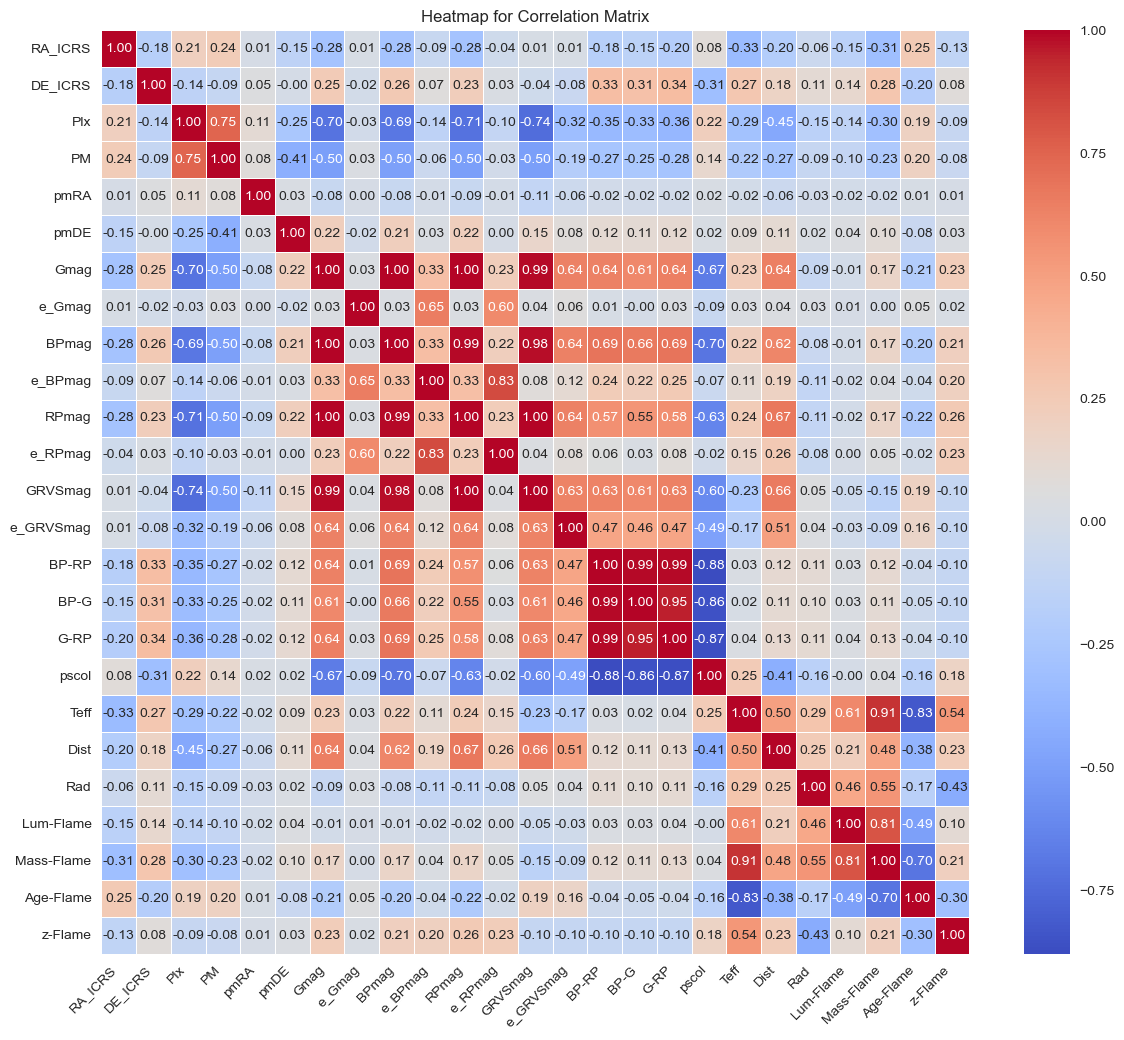

In [ ]:
corr_matrix = X.select_dtypes(include=[np.number]).corr()
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1) # Generate a mask for the upper triangle

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=45, ha="right")
plt.title('Heatmap for Correlation Matrix')
plt.show()

## B. Data Preprocessing

In [8]:
# Shouldn't use Y = (Y == 'B').astype(int)
# As when running it more than once, it will convert everything to 0
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
pd.value_counts(Y)

0    80088
1    68450
Name: count, dtype: int64

### 1. Data Splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
Y_cnts = pd.value_counts(Y).to_list()
y_train_cnts = pd.value_counts(y_train).to_list()
y_test_cnts = pd.value_counts(y_test).to_list()

pd.DataFrame({
    'Original Data': [*Y_cnts, sum(Y_cnts), f'{Y_cnts[0] / Y_cnts[1]:.5f}'],
    'Training Set': [*y_train_cnts, sum(y_train_cnts), f'{y_train_cnts[0] / y_train_cnts[1]:.5f}'],
    'Test Set': [*y_test_cnts, sum(y_test_cnts), f'{y_test_cnts[0] / y_test_cnts[1]:.5f}'],
}, index=[*label_encoder.classes_, 'Total', 'Ratio']).T

,0,1,Total,Ratio
Original Data,80088,68450,148538,1.17002
Training Set,64070,54760,118830,1.17001
Test Set,16018,13690,29708,1.17005


### 2. Handling Missing Values

In [10]:
# Checking columns with missing values
summary[['nulls_count', 'nulls_percent']]\
    [summary.nulls_count > 0].sort_values('nulls_count', ascending=False)

,nulls_count,nulls_percent
pscol,143685,96.732823
GRVSmag,64054,43.122972
e_GRVSmag,64054,43.122972
Age-Flame,38016,25.593451
Mass-Flame,12551,8.449690
Lum-Flame,2995,2.016319
z-Flame,2995,2.016319


In [11]:
# Handling missing values in columns with significant missing entries
# Remove columns 'GRVSmag', 'e_GRVSmag', 'pscol' due to high missing data
removed_columns = ['GRVSmag', 'e_GRVSmag', 'pscol']
X_train.drop(columns=removed_columns, inplace=True, errors='ignore')
X_test.drop(columns=removed_columns, inplace=True, errors='ignore')
X_train.columns

Index(['RA_ICRS', 'DE_ICRS', 'Plx', 'PM', 'pmRA', 'pmDE', 'Gmag', 'e_Gmag',
       'BPmag', 'e_BPmag', 'RPmag', 'e_RPmag', 'BP-RP', 'BP-G', 'G-RP', 'Teff',
       'Dist', 'Rad', 'Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame'],
      dtype='object')

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7) # Imputation for columns with missing values
imputer.set_output(transform='pandas')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
X_train.isnull().sum()

RA_ICRS       0
DE_ICRS       0
Plx           0
PM            0
pmRA          0
pmDE          0
Gmag          0
e_Gmag        0
BPmag         0
e_BPmag       0
RPmag         0
e_RPmag       0
BP-RP         0
BP-G          0
G-RP          0
Teff          0
Dist          0
Rad           0
Lum-Flame     0
Mass-Flame    0
Age-Flame     0
z-Flame       0
dtype: int64

In [ ]:
import pickle
# This process takes such a long time, so it would be safe to save the result
X_train.to_csv('X_train_imputed.csv', index=False)
X_test.to_csv('X_test_imputed.csv', index=False)

with open('imputer.pkl', 'wb') as file:
    pickle.dump(imputer, file)

### 3. Handling Outliers

In [12]:
X_train = pd.read_csv('X_train_imputed.csv')
X_test = pd.read_csv('X_test_imputed.csv')

# Apply winsorizing to cap outliers within the 5th and 95th percentiles for selected columns
X_train, outliers_summary = winsorize_outliers(X_train, limits=[0.05, 0.05])
X_test, _ = winsorize_outliers(X_test, limits=[0.05, 0.05])
outliers_summary

,outliers_count_before,outliers_percent_before,outliers_count_after,outliers_percent_after
e_RPmag,18189,15.306741,18189,15.306741
e_BPmag,16939,14.254818,16939,14.254818
e_Gmag,14358,12.082807,14358,12.082807
Lum-Flame,13628,11.468484,13628,11.468484
DE_ICRS,9140,7.691660,9140,7.691660
PM,7878,6.629639,7878,6.629639
pmRA,13212,11.118404,7566,6.367079
pmDE,10590,8.911891,7555,6.357822
Mass-Flame,7039,5.923588,7039,5.923588
Plx,6748,5.678701,6672,5.614744


### 4. PCA for High-correlated Features with Same Scale

In [13]:
pca_features = {
    'pca_mag': ['Gmag', 'BPmag', 'RPmag'], # Grouping magnitudes
    'pca_color': ['BP-RP', 'BP-G', 'G-RP'], # Grouping colors
    'pca_error': ['e_Gmag', 'e_BPmag', 'e_RPmag'] # Grouping errors
}

pca_dict, X_train = pca_grouping_train(X_train, pca_features)
X_test = pca_grouping_test(X_test, pca_dict, pca_features)
print(f'The dataset now has {X_train.shape[1]} features:\n{X_train.columns}')

The new pca_mag feature explains 99.66% of the variance
The new pca_color feature explains 99.46% of the variance
The new pca_error feature explains 95.67% of the variance
The dataset now has 16 features:
Index(['RA_ICRS', 'DE_ICRS', 'Plx', 'PM', 'pmRA', 'pmDE', 'Teff', 'Dist',
       'Rad', 'Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame', 'pca_mag',
       'pca_color', 'pca_error'],
      dtype='object')


### 5. Feature Scaling

In [14]:
from sklearn.preprocessing import RobustScaler, StandardScaler
robust_scaler = RobustScaler() # for features containing outliers
standard_scaler = StandardScaler() # for other numeric features

robust_cols = outliers_summary[
    ~outliers_summary.index.isin(sum(pca_features.values(), [])) & # Exclude 3 feature groups used for PCA as they are grouped above
    (outliers_summary.outliers_count_after > 0) # Exclude columns without outliers
].index.tolist() + ['pca_error'] # Include the new pca_error feature
standard_cols = X_train.select_dtypes(include=[np.number]).columns.difference(robust_cols)

X_train[robust_cols] = robust_scaler.fit_transform(X_train[robust_cols])
X_train[standard_cols] = standard_scaler.fit_transform(X_train[standard_cols])
X_test[robust_cols] = robust_scaler.transform(X_test[robust_cols])
X_test[standard_cols] = standard_scaler.transform(X_test[standard_cols])
stats_summary(X_train).round(2)

,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
RA_ICRS,118830.0,-0.00,1.00,-1.07,-0.76,-0.41,1.08,2.03,1.00,1.85,0.91,-0.82,0,0,0.0,0.00
DE_ICRS,118830.0,-0.23,0.86,-2.23,-0.55,0.00,0.45,0.69,0.74,1.00,-1.10,0.14,0,9140,0.0,7.69
Plx,118830.0,0.30,0.78,-0.49,-0.31,0.00,0.69,2.35,0.61,1.00,1.22,0.65,0,6672,0.0,5.61
PM,118830.0,0.31,0.86,-0.54,-0.32,0.00,0.68,2.62,0.73,1.00,1.35,0.99,0,7879,0.0,6.63
pmRA,118830.0,0.01,1.00,-1.98,-0.54,0.00,0.46,2.39,1.01,1.00,0.32,0.43,0,7566,0.0,6.37
pmDE,118830.0,-0.26,0.91,-2.50,-0.69,0.00,0.31,1.18,0.83,1.00,-0.90,0.31,0,7555,0.0,6.36
Teff,118830.0,0.04,0.76,-0.85,-0.63,-0.00,0.37,2.01,0.57,1.00,0.98,0.48,0,6235,0.0,5.25
Dist,118830.0,-0.00,1.00,-1.16,-0.88,-0.30,0.76,2.12,1.00,1.63,0.66,-0.78,0,0,0.0,0.00
Rad,118830.0,0.00,1.00,-1.17,-0.77,-0.30,0.53,2.43,1.00,1.30,1.00,0.10,0,0,0.0,0.00
Lum-Flame,118830.0,0.65,1.62,-0.40,-0.28,0.00,0.72,6.04,2.61,1.00,2.32,4.60,0,13628,0.0,11.47


## C. Modelling

In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
from tqdm.notebook import tqdm

### 1. Cross-validation with Base Classifiers

In [16]:
# Initializing classifiers with default parameters
classifiers = [
    SVC(),
    KNeighborsClassifier(n_jobs=-1),
    MLPClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    AdaBoostClassifier()
]

In [ ]:
# results = []
# for clf in tqdm(classifiers):
#     start_time = time.time()
#     scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1', n_jobs=-1)
#     duration = time.time() - start_time

#     result = {'model_name': clf.__class__.__name__, 'mean_f1': scores.mean(), 'duration': duration}
#     print(f"[{result['model_name']}] Mean F1-score = {result['mean_f1']:.3f} ± {scores.std():.3f}, Duration = {duration:.3f}s")
#     results.append(result)
# results = pd.DataFrame(results)

In [ ]:
def plot_learning_curve(clf, X, y, ax=None, ylim=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='f1'):
    if ax is None: _, ax = plt.subplots(1, 1, figsize=(15, 5))
    if ylim is not None: ax.set_ylim(*ylim)
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        clf, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring,
        return_times=True, verbose=2, n_jobs=-1
    )

    # Mean and standard deviation of training and test scores
    mean_train_scores, std_train_scores = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    mean_test_scores , std_test_scores  = np.mean(test_scores, axis=1) , np.std(test_scores, axis=1)
    mean_fit_times   , std_fit_times    = np.mean(fit_times, axis=1)   , np.std(fit_times, axis=1)

    # Plot learning curves
    ax.grid(visible=True)
    ax.fill_between(train_sizes, mean_train_scores - std_train_scores, mean_train_scores + std_train_scores, alpha=0.1, color='r')
    ax.fill_between(train_sizes, mean_test_scores - std_test_scores, mean_test_scores + std_test_scores, alpha=0.1, color='g')
    ax.plot(train_sizes, mean_train_scores, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, mean_test_scores, 'o-', color='g', label='Cross-validation score')
    ax.set_title(f'{clf.__class__.__name__} (Fit Time: {mean_fit_times[-1]:.2f} ± {std_fit_times[-1]:.2f}s)')

    ax.legend(loc='lower right', frameon=True, shadow=True)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    return {
        'model_name': clf.__class__.__name__, # Last element corresponds to the full dataset cross-validation
        'mean_train_score': mean_train_scores[-1], 'mean_test_score': mean_test_scores[-1], 'mean_fit_time': mean_fit_times[-1],
        'std_train_score' : std_train_scores[-1] , 'std_test_score' : std_test_scores[-1] , 'std_fit_time' : std_fit_times[-1]
    }

  0%|          | 0/6 [00:00<?, ?it/s]

[learning_curve] Training set sizes: [ 9506 30895 52285 73674 95064]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  7.5min remaining:  6.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 15.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 9506 30895 52285 73674 95064]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed: 10.6min remaining:  9.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 18.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 9506 30895 52285 73674 95064]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  6.5min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 9506 30895 52285 73674 95064]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   10.2s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   18.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 9506 30895 52285 73674 95064]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  3.0min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[learning_curve] Training set sizes: [ 9506 30895 52285 73674 95064]


[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished


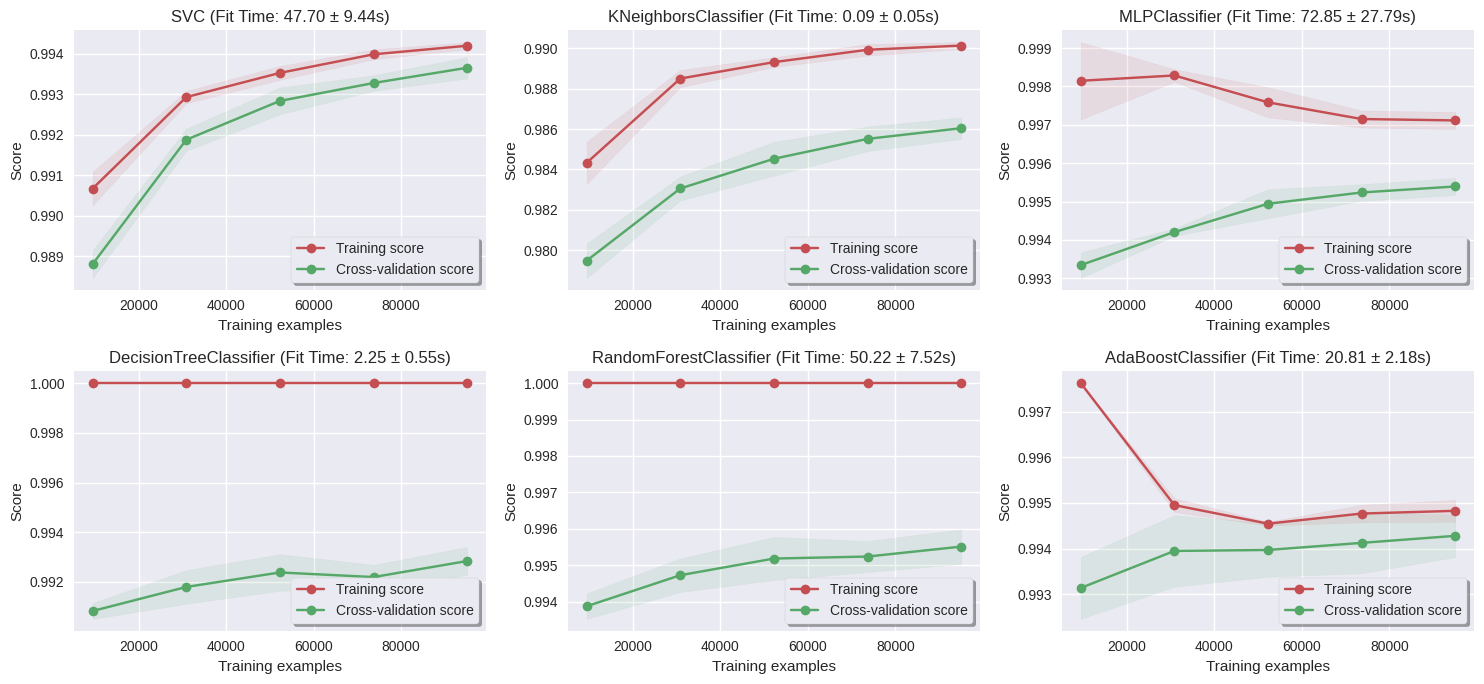

In [160]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.ravel()
cv_results = []

for idx, clf in enumerate(tqdm(classifiers)):
    f1_result = plot_learning_curve(clf, X_train, y_train, ax=axes[idx], cv=5)
    cv_results.append(f1_result)

plt.tight_layout()
plt.show()

In [13]:
cv_results = pd.DataFrame(cv_results).sort_values('mean_test_score', ascending=False, ignore_index=True)
cv_results.to_csv('learning_curve.csv', index=False)
cv_results

,model_name,mean_train_score,mean_test_score,mean_fit_time,std_train_score,std_test_score,std_fit_time
0,RandomForestClassifier,1.000000,0.995512,50.224332,0.000000,0.000476,7.519947
1,MLPClassifier,0.997115,0.995393,72.850752,0.000222,0.000224,27.793389
2,AdaBoostClassifier,0.994827,0.994279,20.810329,0.000239,0.000466,2.183351
3,SVC,0.994195,0.993652,47.702046,0.000089,0.000263,9.436550
4,DecisionTreeClassifier,1.000000,0.992841,2.253132,0.000000,0.000563,0.545505
5,KNeighborsClassifier,0.990123,0.986040,0.085705,0.000170,0.000531,0.052968


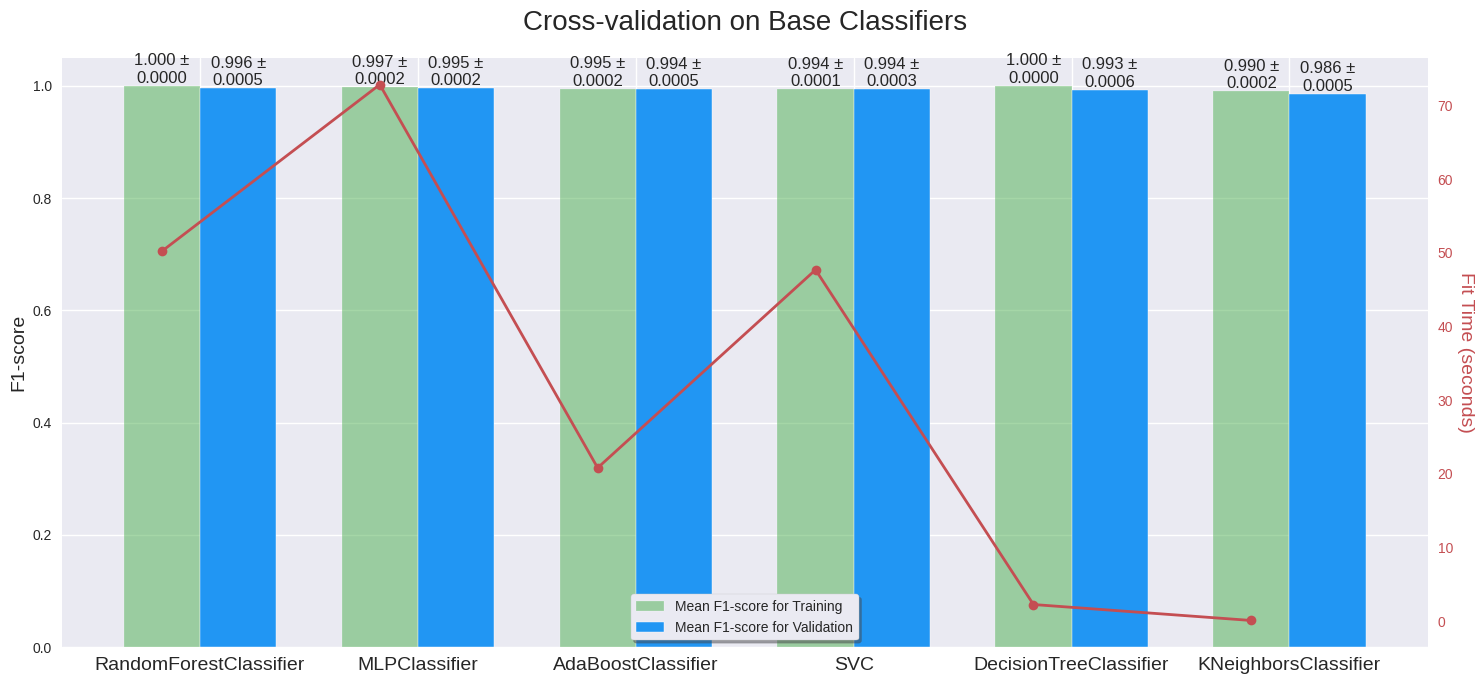

In [202]:
def plot_cv_results(cv_results, title='Cross-validation', bar_width=0.35, fontsize=14, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    index = np.arange(len(cv_results['model_name']))
    train_bars = plt.bar(index, cv_results['mean_train_score'], bar_width, label='Mean F1-score for Training', color='#4CAF50', alpha=0.5)
    test_bars = plt.bar(index + bar_width, cv_results['mean_test_score'], bar_width, label='Mean F1-score for Validation', color='#2196F3')
    plt.title(title, fontsize=fontsize+6, pad=20)
    plt.ylabel('F1-score', fontsize=fontsize)
    plt.xticks(index + bar_width / 2, cv_results['model_name'], ha='center', fontsize=fontsize)
    plt.legend(loc='lower center', frameon=True, shadow=True)

    # Adding the data labels on the bars
    for idx, bars in enumerate((train_bars, test_bars)):
        stds = cv_results['std_test_score'] if idx else cv_results['std_train_score']
        for bar, std in zip(bars, stds):
            f1_mean = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, f1_mean, f'{f1_mean:.3f} ±\n{std:.4f}', fontsize=fontsize-2, va='bottom', ha='center')

    ax2 = plt.gca().twinx() # Adding secondary axis for fit time
    ax2.plot(cv_results['model_name'], cv_results['mean_fit_time'], color='r', marker='o', label='Fit Time Mean (s)', linewidth=2)
    ax2.set_ylabel('Fit Time (seconds)', color='r', fontsize=fontsize, rotation=270, labelpad=15)
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.yaxis.set_label_position('right')
    ax2.grid(False)
    plt.tight_layout()
    plt.show()

plot_cv_results(cv_results, title='Cross-validation on Base Classifiers')

### 2. HalvingRandomSearchCV for Potential Classifiers

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

potential_classifiers = {
    'MLPClassifier': MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
    'AdaBoostClassifier':  AdaBoostClassifier(),
}

param_distributions = {
    'MLPClassifier': {
        'hidden_layer_sizes': [(100,), (100, 100)], 'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.001, 0.01, 0.1], 'learning_rate': ['constant', 'adaptive'],
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300], 'class_weight': ['balanced', None],
        'max_features': ['sqrt', 'log2', None]
    },
    'AdaBoostClassifier': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]},

}

searchers = {}
for model_name, clf in tqdm(potential_classifiers.items()):
    searchers[model_name] = HalvingRandomSearchCV(
        clf, param_distributions[model_name], resource='n_samples', factor=3, cv=5,
        scoring='f1', return_train_score=True, random_state=42, verbose=3
    ).fit(X_train, y_train)

  0%|          | 0/3 [00:00<?, ?it/s]

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 8
min_resources_: 20
max_resources_: 118830
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 20
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001;, score=(train=1.000, test=0.500) total time=   0.1s
[CV 2/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 3/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 4/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001;, score=(train=1.000, test=1.000) total time=   0.1s
[CV 5/5] END alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.001;, score=(tr

### 3. Best Search Estimators Evaluation

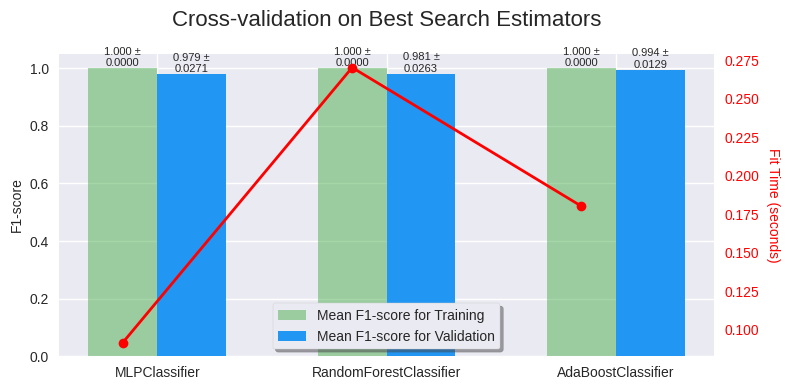

In [102]:
best_estimator_cv_results = []
for model_name, searcher in searchers.items():
    best_cv_result = pd.DataFrame(searcher.cv_results_).iloc[searcher.best_index_].to_dict()
    best_cv_result['model_name'] = model_name
    best_estimator_cv_results.append(best_cv_result)

best_estimator_cv_results = pd.DataFrame(best_estimator_cv_results).to_dict(orient='list')
plot_cv_results(
    best_estimator_cv_results, bar_width=0.3, fontsize=10, figsize=(8, 4),
    title='Cross-validation on Best Search Estimators'
)

The reason why the **mean validation score** and the **mean fit time** look smaller than that in the **initial testing** is that this is just the average result **HalvingRandomSearchCV** performed on small subset of resource, the `n_samples`, for quick candidates filtering. After acquiring the best estimator, it will `refit` on the whole dataset, which is set as default (`refit=True`), leading to the final result.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
reports, conf_matrices, roc_aucs = {}, {}, {}

for model_name, searcher in searchers.items():
    y_pred = searcher.best_estimator_.predict(X_test)
    y_probs = searcher.best_estimator_.predict_proba(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1]) # Use [:, 1] for positive class probabilities

    reports[model_name] = pd.DataFrame(report).T
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)
    roc_aucs[model_name] = (fpr, tpr, auc(fpr, tpr))

In [ ]:
html_str, width = '', 100 / len(reports)
for model_name, report_df in reports.items():
    html_str += f"""
    <div style='width:{width}%; float: left; overflow-x: auto;'>
        <center>
            Classification Report for <b>{model_name}</b><br>
            Best settings: <b>{searchers[model_name].best_params_}</b>
        </center>
        {report_df.to_html()}
    </div>"""
display_html(html_str, raw=True)

,precision,recall,f1-score,support
0,0.996622,0.994756,0.995688,16018.000000
1,0.993878,0.996056,0.994965,13690.000000
accuracy,0.995355,0.995355,0.995355,0.995355
macro avg,0.995250,0.995406,0.995327,29708.000000
weighted avg,0.995358,0.995355,0.995355,29708.000000
,precision,recall,f1-score,support
0,0.996564,0.995942,0.996253,16018.000000
1,0.995255,0.995982,0.995619,13690.000000
accuracy,0.995961,0.995961,0.995961,0.995961
macro avg,0.995910,0.995962,0.995936,29708.000000


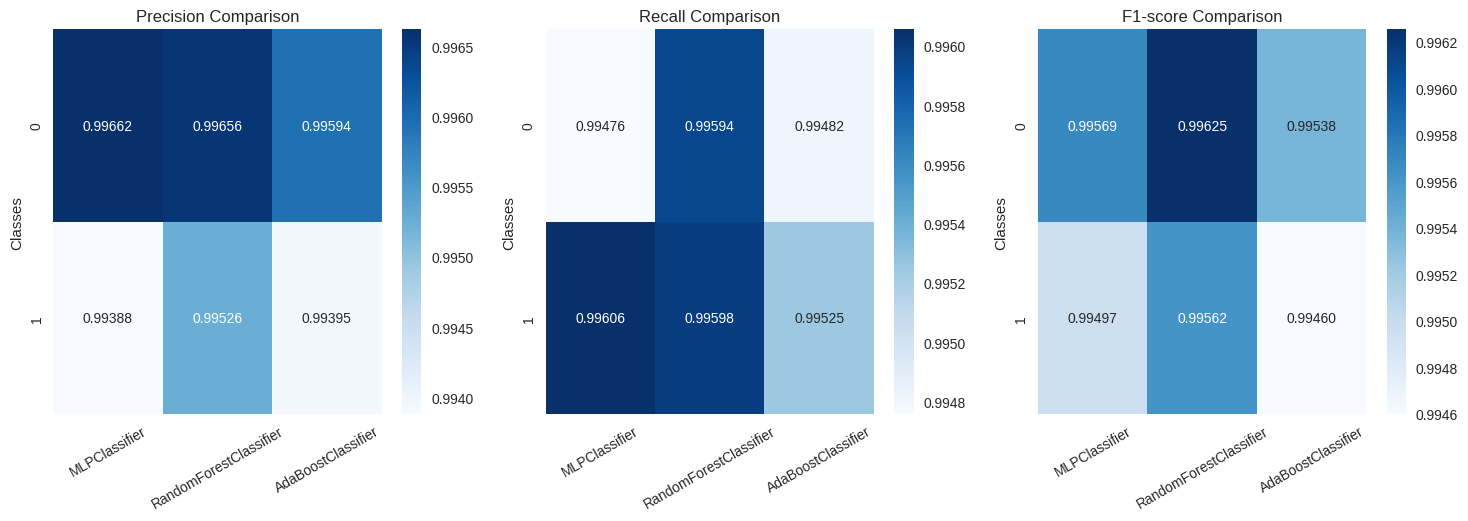

In [ ]:
metrics = ['precision', 'recall', 'f1-score']
overall_scores = {metric: pd.DataFrame() for metric in metrics}

for metric in metrics:
    for model_name, report_df in reports.items():
        overall_scores[metric][model_name] = report_df[metric]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
for ax, metric in zip(axes, metrics):
    sns.heatmap(overall_scores[metric].iloc[:-3, :], annot=True, fmt='.5f', cmap='Blues', ax=ax)
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel('Classes')
    for label in ax.get_xticklabels(): label.set_rotation(30)

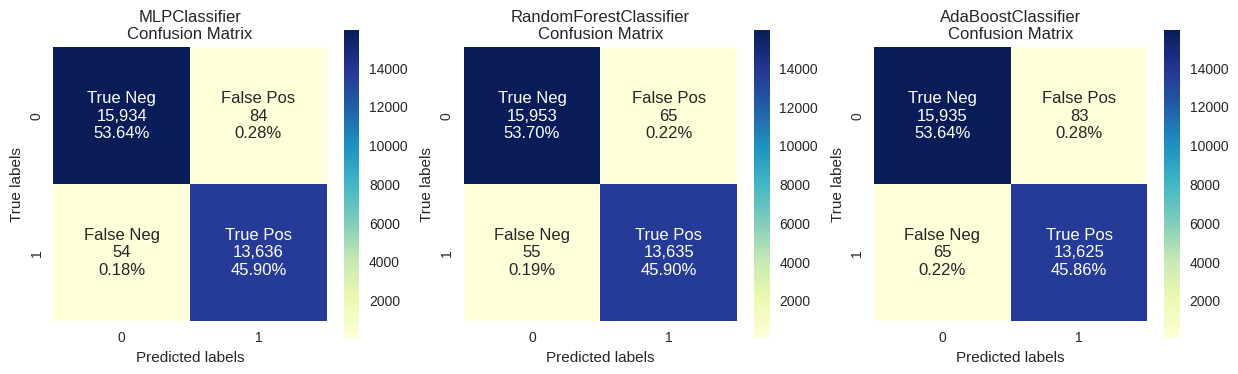

In [ ]:
def plot_cf_matrix(cf_matrix, ax=None):
    labels = np.asarray([f'{name}\n{count:,}\n{percent:.2%}' for name, count, percent in zip(
        ['True Neg', 'False Pos', 'False Neg', 'True Pos'], # Group names
        cf_matrix.flatten(), # Group counts
        cf_matrix.flatten() / np.sum(cf_matrix) # Group percentages
    )]).reshape(2, 2)
    sns.heatmap(cf_matrix, fmt='', annot=labels, cmap='YlGnBu', square=True, annot_kws={'size': 12}, ax=ax)

fig, axes = plt.subplots(1, len(searchers), figsize=(5 * len(searchers), 4))
if len(searchers) == 1: axes = [axes] # Make it iterable
for ax, (name, matrix) in zip(axes, conf_matrices.items()):
    plot_cf_matrix(matrix, ax)
    ax.set_title(f'{name}\nConfusion Matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
plt.show()

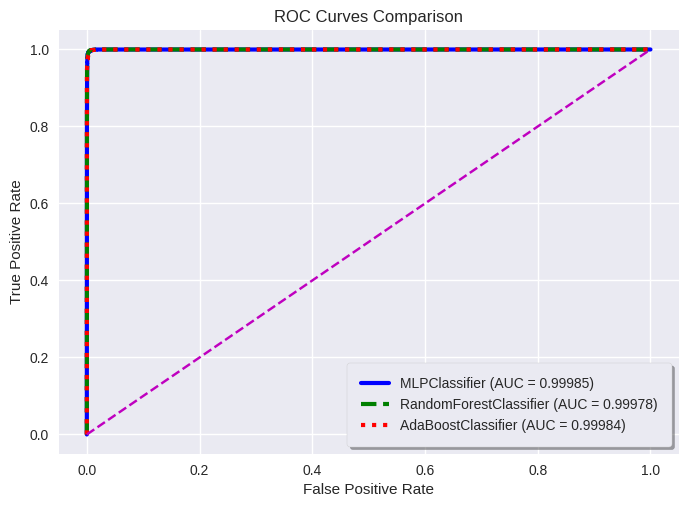

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y']
linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.']

for (name, (fpr, tpr, score)), color, linestyle in zip(roc_aucs.items(), colors, linestyles):
    plt.plot(fpr, tpr, label=f'{name} (AUC = {score:.5f})', color=color, linestyle=linestyle, lw=3)

plt.plot([0, 1], [0, 1], 'm--')  # Dashed diagonal
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', frameon=True, shadow=True, borderpad=1)
plt.show()

### 4. HalvingRandomSearchCV for Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# Setup Voting Classifier with optimized estimators
optimized_estimators = [(name, searcher.best_estimator_) for name, searcher in searchers.items()]
soft_voting_clf = VotingClassifier(estimators=optimized_estimators, voting='soft', n_jobs=-1)

# Based on the performance of each best estimator, the weights are set to prioritize the best performing models
param_grid = {'weights': [[1, 2, 1], [2, 2, 1], [1, 3, 1], [2, 3, 1], [3, 3, 1]]}

voting_searcher = HalvingRandomSearchCV(
    soft_voting_clf, param_grid, resource='n_samples', factor=3, cv=5,
    scoring='f1', return_train_score=True, random_state=42, verbose=3
).fit(X_train, y_train)
best_voting_clf = voting_searcher.best_estimator_

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 8
min_resources_: 20
max_resources_: 118830
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 5
n_resources: 20
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END weights=[1, 2, 1];, score=(train=1.000, test=0.500) total time=   0.4s
[CV 2/5] END weights=[1, 2, 1];, score=(train=1.000, test=1.000) total time=   0.6s
[CV 3/5] END weights=[1, 2, 1];, score=(train=1.000, test=0.000) total time=   0.4s
[CV 4/5] END weights=[1, 2, 1];, score=(train=1.000, test=1.000) total time=   0.4s
[CV 5/5] END weights=[1, 2, 1];, score=(train=1.000, test=0.800) total time=   0.4s
[CV 1/5] END weights=[2, 2, 1];, score=(train=1.000, test=0.500) total time=   0.4s
[CV 2/5] END weights=[2, 2, 1];, score=(train=1.000, test=1.000) total time=   0.4s
[CV 3/5] END weights=[2, 2, 1];, score=(train=1.000, test=1.000) total time=   0.3s
[CV 4/5] END weights=[2, 2, 1];, score=(train=1.000, test=1.000) tota

Best Soft Voting Weights: [2, 3, 1]


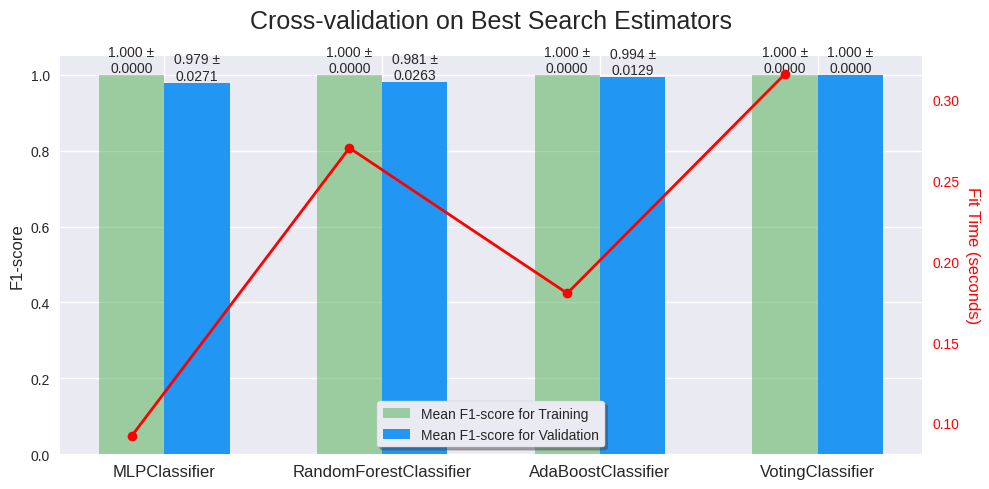

In [109]:
from copy import deepcopy
print('Best Soft Voting Weights:', voting_searcher.best_params_['weights'])
best_cv_results = deepcopy(best_estimator_cv_results)
best_voting_cv_result = pd.DataFrame(voting_searcher.cv_results_).iloc[voting_searcher.best_index_].to_dict()

for key in best_cv_results:
    if key in best_voting_cv_result:
        best_cv_results[key].append(best_voting_cv_result[key])

best_cv_results['model_name'].append('VotingClassifier')
plot_cv_results(
    best_cv_results, bar_width=0.3, fontsize=12, figsize=(10, 5),
    title='Cross-validation on Best Search Estimators'
)

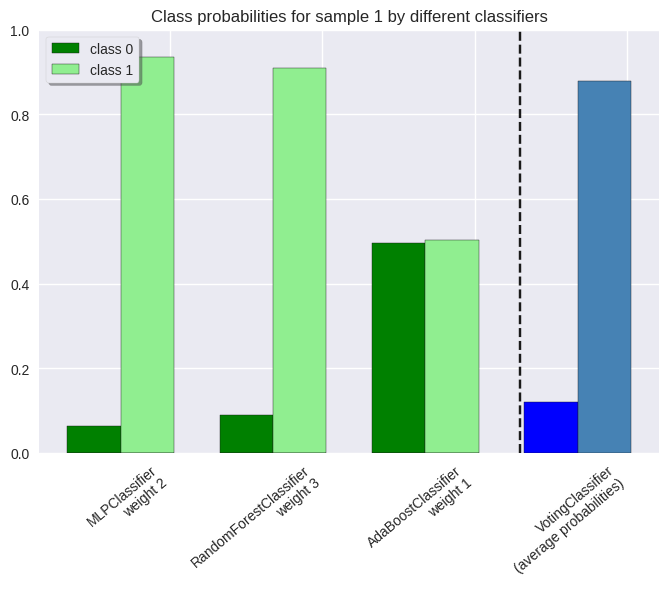

In [214]:
probas = [
    searcher.best_estimator_.predict_proba(X_test) # Predict class probabilities for all classifiers
    for name, searcher in {**searchers, 'VotingClassifier': voting_searcher}.items()
]
class0_0, class1_0 = [pr[0, 0] for pr in probas], [pr[0, 1] for pr in probas] # Get class probabilities for first sample
ind, width = np.arange(4), 0.35 # Group positions & Bar Width
p1 = plt.bar(ind, np.hstack(([class0_0[:-1], [0]])), width, color='green', edgecolor='k') # Bars for classifier 1-3
p2 = plt.bar(ind + width, np.hstack(([class1_0[:-1], [0]])), width, color='lightgreen', edgecolor='k')
p3 = plt.bar(ind, [0, 0, 0, class0_0[-1]], width, color='blue', edgecolor='k') # Bars for VotingClassifier
p4 = plt.bar(ind + width, [0, 0, 0, class1_0[-1]], width, color='steelblue', edgecolor='k')

plt.axvline(2.8, color='k', linestyle='dashed')
plt.xticks(ind + width)
plt.xticks(ind + 0.5, [*[
    f'{name}\nweight {weight}' for name, weight in zip(searchers, voting_searcher.best_params_['weights'])],
    'VotingClassifier\n(average probabilities)' # Plot annotations
], rotation=40, ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 0', 'class 1'], loc='upper left', frameon=True, shadow=True)
plt.show()

In [ ]:
import pickle
with open('searchers.pkl', 'wb') as file:
    pickle.dump(searchers, file)

with open('voting_searcher.pkl', 'wb') as file:
    pickle.dump(voting_searcher, file)

In [17]:
import pickle
with open('searchers.pkl', 'rb') as file:
    searchers = pickle.load(file)

with open('voting_searcher.pkl', 'rb') as file:
    voting_searcher = pickle.load(file)
    best_voting_clf = voting_searcher.best_estimator_
best_voting_clf

VotingClassifier(estimators=[('MLPClassifier',
                              MLPClassifier(learning_rate_init=0.01)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_jobs=-1)),
                             ('AdaBoostClassifier',
                              AdaBoostClassifier(learning_rate=1,
                                                 n_estimators=100))],
                 n_jobs=-1, voting='soft', weights=[2, 3, 1])

### 5. Best Model Evaluation

In [80]:
print('Accuracy on the Test Set:', best_voting_clf.score(X_test, y_test))
y_pred = best_voting_clf.predict(X_test)
y_probs = best_voting_clf.predict_proba(X_test)

pd.concat([
    pd.DataFrame({ 'Actual': y_test, 'Pred': y_pred }),
    pd.DataFrame(y_probs, columns=['A Probability', 'B Probability']),
], axis=1).head()

Accuracy on the Test Set: 0.9964319375252457


,Actual,Pred,A Probability,B Probability
0,1,1,0.121564,0.878436
1,0,0,0.937680,0.062320
2,1,1,0.059800,0.940200
3,1,1,0.059911,0.940089
4,1,1,0.069709,0.930291


              precision    recall  f1-score   support

           0    0.99769   0.99569   0.99669     16018
           1    0.99497   0.99730   0.99613     13690

    accuracy                        0.99643     29708
   macro avg    0.99633   0.99649   0.99641     29708
weighted avg    0.99643   0.99643   0.99643     29708



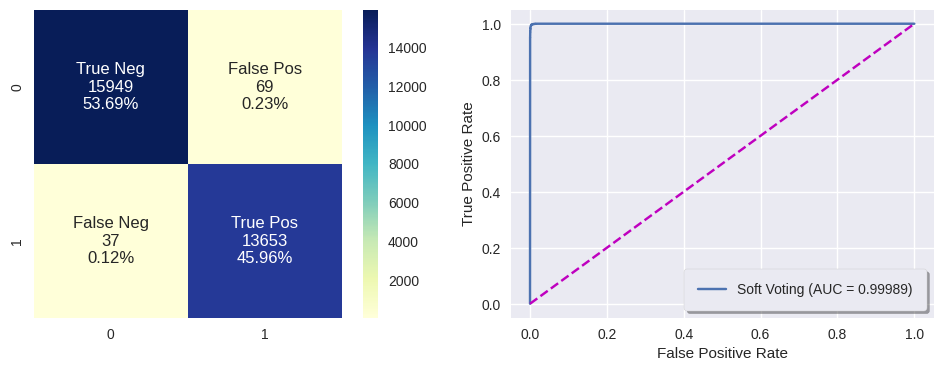

In [ ]:
print(classification_report(y_test, y_pred, digits=5))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_cf_matrix(confusion_matrix(y_test, y_pred))

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
plt.plot(fpr, tpr, label=f'Soft Voting (AUC = {auc(fpr, tpr):.5f})')
plt.plot([0, 1], [0, 1], 'm--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', frameon=True, shadow=True, borderpad=1)
plt.show()

## D. Prediction

In [ ]:
data_unknown = pd.read_csv('dataGaia_AB_unknown.csv', na_values=missing_values)
data_unknown.set_index('ID', inplace=True)
data_unknown = data_unknown.loc[:, ~data_unknown.columns.str.contains('^Unnamed|Source')] # Drop 3 unnecessary columns
data_unknown

,RA_ICRS,DE_ICRS,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,BPmag,e_BPmag,...,BP-G,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame
ID,,,,,,,,,,,,,,,,,,,,,
119089,64.085883,46.209497,0.3386,1.067,-0.841,-0.656,13.132349,0.002769,13.404948,0.002947,...,0.272599,0.444520,NaN,11663.4,2031.7985,2.8537,239.107820,3.514,NaN,0.515510
24912,14.701590,67.754101,1.6877,3.527,-1.976,-2.921,12.781258,0.002763,13.285511,0.002884,...,0.504253,0.678857,NaN,7661.9,615.7902,1.7595,9.183199,1.665,0.749,0.661103
6264,55.953330,38.656112,0.8378,8.216,6.574,-4.927,12.053966,0.002766,12.250828,0.002859,...,0.196862,0.331098,NaN,7820.4,1254.6984,2.9247,23.100883,1.986,0.920,0.322678
81903,91.211868,-14.372262,1.1175,12.945,7.306,10.687,11.559693,0.003260,11.685955,0.005807,...,0.126262,0.251504,NaN,8984.8,890.9888,2.2170,26.935236,2.133,0.499,0.516520
110917,75.949263,40.560254,0.9456,5.200,3.248,-4.061,15.013525,0.003206,15.266448,0.003034,...,0.252923,0.483553,NaN,10195.4,5160.0750,3.3666,111.986990,2.916,0.319,0.441721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109624,72.354966,37.351363,0.1704,0.771,-0.517,-0.572,16.360239,0.002814,16.897928,0.006783,...,0.537689,0.723034,NaN,10047.2,3589.4248,1.9652,36.636715,2.364,0.244,0.536147
19620,33.694149,58.156781,0.6546,3.614,2.664,-2.442,14.314589,0.002887,14.760225,0.003061,...,0.445637,0.658537,NaN,6897.3,2074.6511,2.9905,10.155912,1.628,1.104,0.633390
145075,37.642425,56.450733,0.4109,1.440,-0.381,-1.388,13.153332,0.002774,13.330101,0.002879,...,0.176769,0.315199,NaN,12632.8,2188.9338,2.4096,146.129440,3.343,NaN,0.631161


In [ ]:
# Preprocessing
data_unknown.drop(columns=removed_columns, inplace=True, errors='ignore')
data_unknown = imputer.transform(data_unknown)
data_unknown, outliers_summary = winsorize_outliers(data_unknown, limits=[0.05, 0.05])
data_unknown = pca_grouping_test(data_unknown, pca_dict, pca_features)
data_unknown[robust_cols] = robust_scaler.transform(data_unknown[robust_cols])
data_unknown[standard_cols] = standard_scaler.transform(data_unknown[standard_cols])

In [ ]:
# Make Prediction
y_pred_unknown = best_voting_clf.predict(data_unknown)
y_pred_unknown = label_encoder.inverse_transform(y_pred_unknown)
y_pred_unknown = np.char.add(y_pred_unknown.astype('<U6'), '      ') # Add spaces to match the submission format

pd.DataFrame(
    y_pred_unknown,
    index=data_unknown.index, columns=['SpType-ELS']
)